In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
#load dataset
data = pd.read_csv("data/zomato_df_final_data.csv")
data.head()
data.shape

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


PART A

In [ ]:
#How many unique cuisines are served by Sydney restaurants?
# define a function to get the number of unique values
def unique(data):
    # initialize an empty list to store the unique cuisines
    unique_cuisines = []

    for x in data:
        # check if the element exists in the unique_cuisines list or not
        if pd.notna(x) and x not in unique_cuisines:  #ignoring NaN values
            unique_cuisines.append(x)

    # Number of unique cuisines
    no_unique_cuisine = len(unique_cuisines)

    # the total number of unique cuisines
    return no_unique_cuisine

# Call the function and print the number of unique cuisines
no_unique_cuisine = unique(data['cuisine'])
print(f"Total number of unique cuisines served by Sydney restaurants: {no_unique_cuisine}")



Total number of unique cuisines served by Sydney restaurants: 1759


Total number of unique cuisines served by Sydney restaurants: 1759


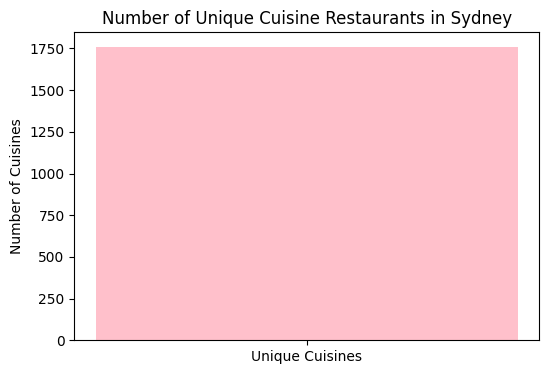

In [ ]:
#How many unique cuisines are served by Sydney restaurants?
#Define the function to get the number of unique values
import matplotlib.pyplot as plt

# Count the number of unique cuisines
unique_cuisines = data['cuisine'].nunique()

print(f"Total number of unique cuisines served by Sydney restaurants: {unique_cuisines}")


# Bar plot for number of unique cuisines
plt.figure(figsize=(6, 4))
plt.bar(['Unique Cuisines'], [unique_cuisines], color='pink')
plt.title('Number of Unique Cuisine Restaurants in Sydney')
plt.ylabel('Number of Cuisines')
plt.show()

Top 3 suburbs with highest number of restaurants
subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


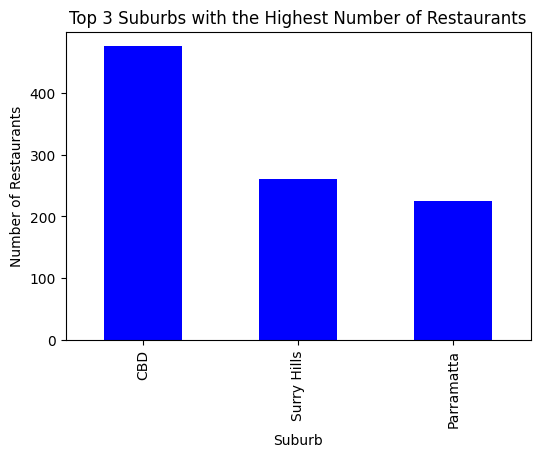

In [ ]:
#which suburbs (top 3) have the highest number of restaurants?
# Group the data by 'subzone' and count the number of restaurants in each suburbs
top3_suburbs = data['subzone'].value_counts().head(3)
print("Top 3 suburbs with highest number of restaurants")
print(top3_suburbs)

# Bar plot for top 3 suburbs
plt.figure(figsize=(6, 4))
top3_suburbs.plot(kind='bar', color='blue')
plt.title('Top 3 Suburbs with the Highest Number of Restaurants')
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants')
plt.show()


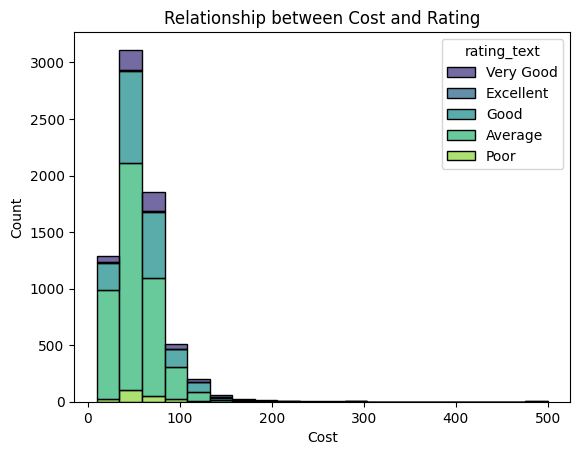

In [ ]:
# comparison between 'cost' and 'rating_text using '
sns.histplot(data, x='cost', hue='rating_text', multiple='stack', bins=20, palette='viridis')
plt.title("Relationship between Cost and Rating")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()


From the graph, the restaurants with excellant rating are highly expensive comparing to the poor rating restaurants. Poor ratings restuarants are rarely expensive.

type
['Casual Dining']                    4854
['Café']                             2767
['Fast Food']                         557
['Food Court']                        480
['Pub']                               284
                                     ... 
['Club', 'Casual Dining']               1
['Dessert Parlour', 'Fast Food']        1
['Dessert Parlour', 'Food Court']       1
['Club', 'Pub']                         1
['Food Court', 'Beverage Shop']         1
Name: count, Length: 66, dtype: int64


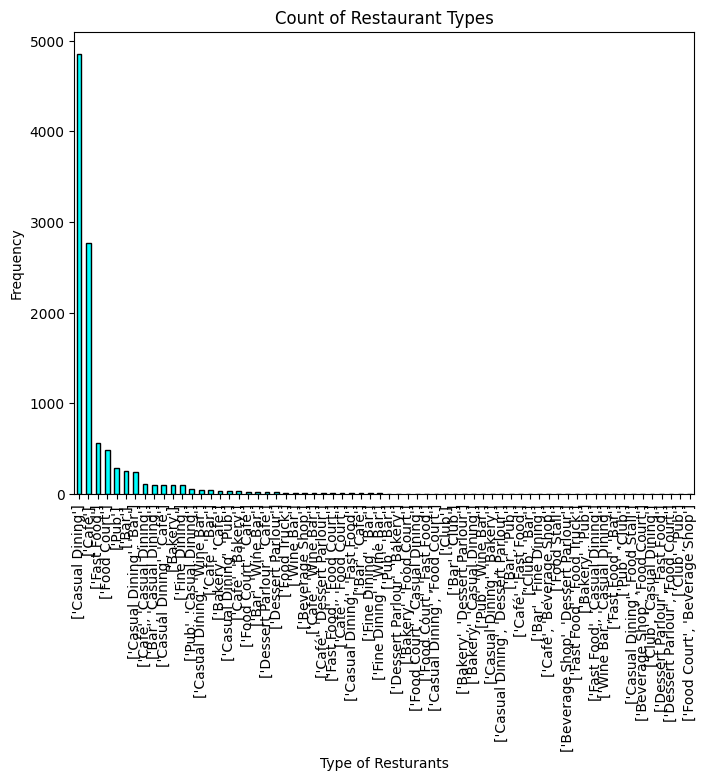

In [ ]:
#Exploratory Analysis
#cost
#descriptive insight
print(data['cost'].describe())

#histogram
# Plotting a histogram for Cost
plt.figure(figsize=(8, 6))
plt.hist(data['cost'], bins=20, edgecolor='#000000', color='#00FFFF')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

#Rating
#descriptive insight
print(data['rating_number'].describe())
#histogram
# Plotting a histogram for Cost
plt.figure(figsize=(8, 6))
plt.hist(data['rating_number'], bins=20, edgecolor='#000000', color='#00FFFF')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Type
#descriptive insight
print(data['type'].value_counts())
#histogram
# Plotting a histogram for Cost
# Bar plot for Type
plt.figure(figsize=(8, 6))
data['type'].value_counts().plot(kind='bar', color='#00FFFF', edgecolor='#000000')
plt.title('Count of Restaurant Types')
plt.xlabel('Type of Resturants')
plt.ylabel('Frequency')
plt.show()



Analysis from the above graphs In the cost distribution graph, it shows the right skew which means most of the restaurants are with affordable pricing but few are a bit expensive.But in case of rating distribution most of the restaurants are avarage in rating and few o them are rated poor and expensive.In the 'Type' bar plot it says most of the restuarants are casual Dining with the frequency of near 5000. Cafe,Fast Food, Food court are next in line.

<ipython-input-159-ec9e9dd20702>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_joined = gp.sjoin(geo_data, gdf_filtered, how='left', predicate='contains')   # spatial join


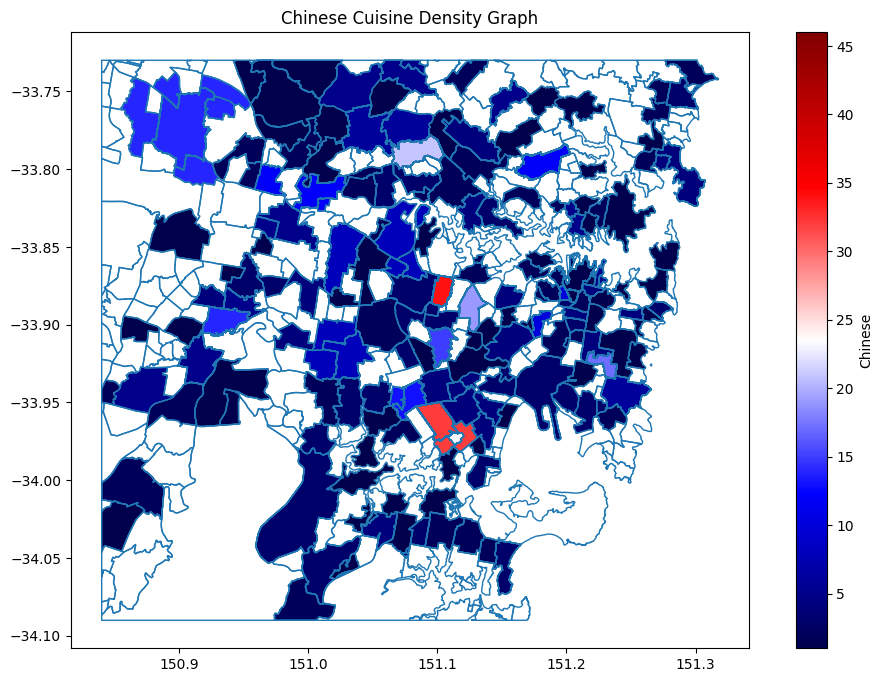

<ipython-input-159-ec9e9dd20702>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_joined = gp.sjoin(geo_data, gdf_filtered, how='left', predicate='contains')   # spatial join


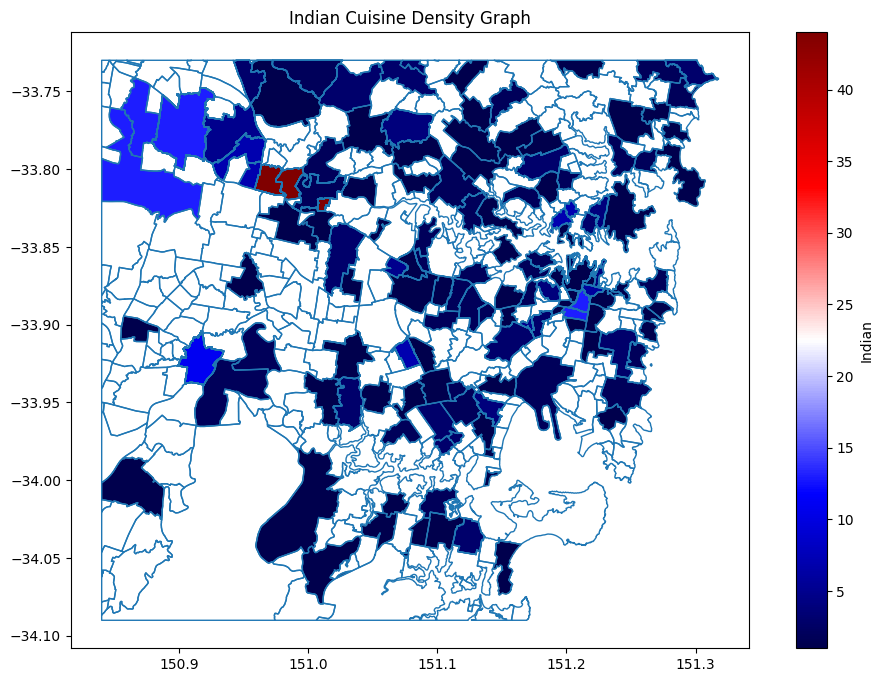

In [ ]:
#Create a map illustrating cuisine density, where each suburb is visually
#represented with colors indicating the number of restaurants offering a specific cuisine."

#Create a map illustrating cuisine density, where each suburb is visually
#represented with colors indicating the number of restaurants offering a specific cuisine."

# Function to plot cuisine density map
def show_cuisinemap(cuisine):
    geo_data =gp.read_file("data/sydney.geojson")
    # Filter restaurants that serve the specified cuisine
    geo_rest = gp.GeoDataFrame(data, geometry=gp.points_from_xy(data.lng, data.lat))
    gdf_filtered = geo_rest[geo_rest['cuisine'].str.contains(cuisine, case=False, na=False)]

    gdf_joined = gp.sjoin(geo_data, gdf_filtered, how='left', predicate='contains')   # spatial join

    gdf_joined['count'] = gdf_joined.groupby('subzone')['subzone'].transform('count') # Count the number of restaurants in each suburb

    # Plot
    fig, ax = plt.subplots(1, figsize=(12, 8))
    gdf_joined.boundary.plot(ax=ax, linewidth=1)
    gdf_joined.plot(column='count', ax=ax, legend=True,
                    legend_kwds={'label':  cuisine},
                    cmap='seismic', linewidth=0.6, edgecolor='0.5')

    plt.title(f"{cuisine} Cuisine Density Graph")
    plt.show()

show_cuisinemap('Chinese')

show_cuisinemap('Indian')

I Feature Engineering

In [ ]:

#checking for categorical variables

# Selecting only the categorical columns (object or category type)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Print the categorical columns
print("Categorical Variables:")
print(categorical_columns)

#checking for nnumberical columns
# Select only the numerical columns (int64, float64)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical columns
print("Numerical Variables:")
print(numerical_columns)


# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# 1. Data Cleaning: Removing/Imputing missing or useless records

#dropping NA values for 'rating_number'
data.dropna(subset=['rating_number'], inplace=True)

#slitting comma-separated values(Cuisine)
data['cuisine']=data['cuisine'].str.split(',')
data=data.explode('cuisine')
data['cuisine']=data['cuisine'].str.replace('[',' ') # removing the [] form the cuisine column
data['cuisine']=data['cuisine'].str.replace(']',' ')


#replacing missing value in cost with average cost
data['cost'].fillna(data['cost'].median(), inplace=True)
data['cost_2'].fillna(data['cost_2'].median(),inplace=True)

#dropping rows 'lat', 'lng'
data.dropna(subset=['lat','lng'],inplace=True)

#filling missing values in votes with 0
data['votes'].fillna(0,inplace=True)

#filling missing values in type with 'not given'
data['type'].fillna('not given', inplace=True)

print(missing_values)


Categorical Variables:
Index(['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone',
       'title', 'type', 'color', 'cuisine_color'],
      dtype='object')
Numerical Variables:
Index(['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2'], dtype='object')
address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype: int64
address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype: int64


In [ ]:
#Proper feature encoding for each feature

# Encode categorical features
label_encoder = LabelEncoder()
data['type_encode'] = label_encoder.fit_transform(data['type'])
data['subzone_encode'] = label_encoder.fit_transform(data['subzone'])
data['rating_encode'] = label_encoder.fit_transform(data['rating_text'])
data['cuisine_encode'] = label_encoder.fit_transform(data['cuisine'])
data['title_encode'] = label_encoder.fit_transform(data['title'])
data['color_encode'] = label_encoder.fit_transform(data['color'])
data['cuisine_color_encode'] = label_encoder.fit_transform(data['cuisine_color'])

# Display the cleaned and encoded data
print(data.head())

                                          address  cost        cuisine  \
0                   371A Pitt Street, CBD, Sydney  50.0      'Hot Pot'   
0                   371A Pitt Street, CBD, Sydney  50.0   'Korean BBQ'   
0                   371A Pitt Street, CBD, Sydney  50.0          'BBQ'   
0                   371A Pitt Street, CBD, Sydney  50.0      'Korean'    
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0         'Cafe'   

         lat                                               link         lng  \
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1 -33.910999  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   V

II Regression

In [ ]:
#Defining the feature columns and target columns

x=data[['type_encode', 'subzone_encode','cost','cuisine_encode','rating_encode']]
y=data['rating_number']

#split the dataset into 80% training and 20% testing
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
#Model 1 LinearRegression

model1 =LinearRegression()

#taining the model
model1.fit(x_train,y_train)
# Predict the ratings on the test set
y_pred = model1.predict(x_test)

# Calculate performance metrics
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse_1}")
print(f"R-squared (R2): {r2_1}")

Mean Squared Error (MSE): 0.13349157023141847
R-squared (R2): 0.3674876810280392


In [ ]:
#Model 2 using Gradient Descent
model2 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)

#taining the model
model2.fit(x_train,y_train)
# Predict the ratings on the test set
y_pred2 = model2.predict(x_test)

# Calculate performance metrics
mse_2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse_2}")
print(f"R-squared (R2): {r2_2}")


Mean Squared Error (MSE): 4.3701780843376655e+26
R-squared (R2): -2.0706861636677938e+27


Report the MSE value for both the models



In [ ]:
print(f"Mean Squared Error (MSE) for Regression model 1 (Linear Regression): {mse_1}")
print(f"Mean Squared Error (MSE) for Regression model 2 (Gradient Descent): {mse_2}")

Mean Squared Error (MSE) for Regression model 1 (Linear Regression): 0.13349157023141847
Mean Squared Error (MSE) for Regression model 2 (Gradient Descent): 4.3701780843376655e+26


III Classification

In [ ]:

# Simplify the problem into binary classification
# Map 'Poor' and 'Average' to class 1, and 'Good', 'Very Good', 'Excellent' to class 2
binary_rating_mapping = {
    'Poor': 1,
    'Average': 1,
    'Good': 2,
    'Very Good': 2,
    'Excellent': 2
}

# Create a new binary target column based on the mapping
data['binary_rating'] = data['rating_text'].map(binary_rating_mapping)

# Drop rows with missing values in 'binary_rating' (if any)
data = data.dropna(subset=['binary_rating'])

# Define the features (X) and the target (y) for binary classification
x = data[['type_encode', 'subzone_encode', 'cost', 'cuisine_encode', 'rating_encode']]
y = data['binary_rating']

# Split the dataset into 80% training and 20% testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize the Logistic Regression model
model3 = LogisticRegression(max_iter=1000, random_state=0)

# Train the model
model3.fit(x_train, y_train)

# Predict the binary classification on the test set
y_pred_3 = model3.predict(x_test)

# Generate and display classification report
report = classification_report(y_test, y_pred_3)
print(report)



              precision    recall  f1-score   support

           1       0.99      0.95      0.97      1490
           2       0.91      0.98      0.95       820

    accuracy                           0.96      2310
   macro avg       0.95      0.96      0.96      2310
weighted avg       0.96      0.96      0.96      2310



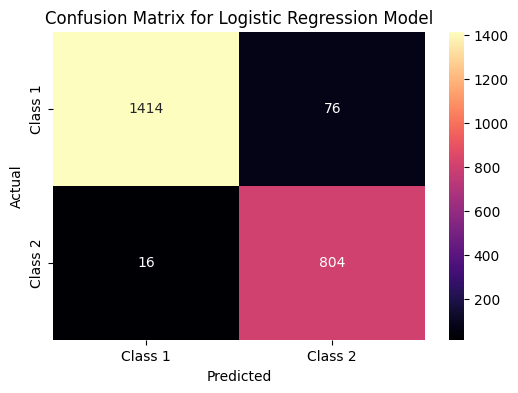

Accuracy of the model: 0.9602


In [ ]:
#Confusion Matrix
# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_3)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy from the confusion matrix values
accuracy = (conf_mat[0, 0] + conf_mat[1, 1]) / conf_mat.sum()

# Print the accuracy
print(f"Accuracy of the model: {accuracy:.4f}")


The confusion matrix says the binary classification model could classify into two binary classes Class 1 an Class 2 with some misclassification.
For the report, it is clearly suggest that the accuracy of the  model is 96% which is a hight accuracy rate suggest almost all the data is classified correctly in the respective classes Class1 and Class2.

Decision Tree

In [ ]:


# Initialize the DecisionTreeClassifier model
model4 = DecisionTreeClassifier(random_state=0)

# Train the model
model4.fit(x_train, y_train)

# Prediction the test set
y_pred_4 = model4.predict(x_test)

# Generate and display classification report

report = classification_report(y_test, y_pred_4)
print("Decision Tree Classifier of the model:")
print(report)



Decision Tree Classifier of the model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1490
           2       1.00      1.00      1.00       820

    accuracy                           1.00      2310
   macro avg       1.00      1.00      1.00      2310
weighted avg       1.00      1.00      1.00      2310



The decision tree classifier shows a perfect precision, recall, and F1-scores of 1.00 for both classes.The classifier is overfitted so a further tuning is required for this to do a better classification

Random Forest Classifier

In [ ]:

# Initialize the DecisionTreeClassifier model
model5 = RandomForestClassifier(random_state=0)

# Train the model
model5.fit(x_train, y_train)

# Prediction the test set
y_pred_5 = model5.predict(x_test)

# Generate and display classification report

report = classification_report(y_test, y_pred_5)
print("Random Forest Classifier of the model:")
print(report)

Random Forest Classifier of the model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1490
           2       1.00      1.00      1.00       820

    accuracy                           1.00      2310
   macro avg       1.00      1.00      1.00      2310
weighted avg       1.00      1.00      1.00      2310



 The Random Forest Classifier perform same as  Decision tree classifier.The classifier is overfitted so a further tuning is required for this to do a better classification

Support Vector Machine

In [ ]:

# Initialize the DecisionTreeClassifier model
model6 = SVC(random_state=0)

# Train the model
model6.fit(x_train, y_train)

# Prediction the test set
y_pred_6 = model6.predict(x_test)

# Generate and display classification report

report = classification_report(y_test, y_pred_6)
print("Support Vector Machine Classifier of the model:")
print(report)

Support Vector Machine Classifier of the model:
              precision    recall  f1-score   support

           1       0.65      1.00      0.79      1490
           2       0.88      0.05      0.09       820

    accuracy                           0.66      2310
   macro avg       0.77      0.52      0.44      2310
weighted avg       0.74      0.66      0.54      2310



Support vector machine shows more balanced result.
Class 1 has a  precision of 0.65 and a perfect recall of 1.00. This means the model is identifying all the instances of Class 1 but also misclassifying many instances from Class 2 as Class 1.
Class 2 has a high precision (0.88) but a very low recall (0.05). This means the model struggles to detect Class 2 instances and tends to misclassify them as Class 1.